# NQ-4-HandsOnAnalysis_HowManyTopK

- NQ(KILT) dev FiD with BM25 negative passages
    - Method3. '00011011000'  -> 
    <span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (__0.73651__)  

- NQ dev with FiD retrieved passages
    - Method3. '00011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (__0.57839__)     

- Both cases show that including consecutive 0s improved the overall output
- So Questions : How many consecutive 0s are needed?

    - NQ dev with FiD retrieved passages
    - 20 passages
    - 100 passages

In [1]:
from collections import Counter
import numpy as np
import pathlib
from pprint import pprint
import pandas as pd
from util import utils
import re
import os
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
sample_size = 100
input_file = f'/data/philhoon-relevance/FiD/results/NQ_DPR/DEV/incremental_result_{sample_size}/ctx{sample_size}.json'

In [3]:
input_ = utils.open_json(input_file)

In [4]:
total_instance = len(input_)

In [5]:
total = 0
num_zero_lst = []

In [6]:
for inst_ in input_:
    pattern = inst_['em_pattern']
    if pattern.startswith('0') and pattern != '0' * sample_size:
#         print(pattern)
        result = re.search("^0+", pattern)
        total += 1
        num_zero_lst.append(result.span()[-1])
#     print(pattern)
# print(total)

In [7]:
print(total)

2457


In [8]:
zero_array = np.array(num_zero_lst)

In [9]:
counts = Counter(num_zero_lst)

In [10]:
sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[0])}

In [11]:
# bin_size
bin_ = 10

In [12]:
bin_counts = {}
cur = 0
size = deepcopy(bin_)
for key, value in sorted_counts.items():
    if key < bin_:
        cur += value
    if key == bin_:
        cur += value
        bin_counts[bin_] = cur/total
        cur = 0 
        bin_ += size
    if key > bin_:
        bin_counts[bin_] = cur/total
        cur = value
        bin_ += size
        
        
print(bin_)

100


In [13]:
# sum(bin_counts.values())

In [14]:
bin_counts

{10: 0.7680097680097681,
 20: 0.09157509157509157,
 30: 0.052096052096052094,
 40: 0.02726902726902727,
 50: 0.016687016687016686,
 60: 0.01098901098901099,
 70: 0.010582010582010581,
 80: 0.010582010582010581,
 90: 0.004477004477004477}

In [15]:
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# # ax.plot(df['ctx'], selected_data['em'], label=pos, alpha = 0.5, linewidth=5)
# ax.plot(df_normal['ctx'],df_normal['em'], label='dpr eval', alpha = 0.3, linewidth=5, color = 'blue', marker = "o")    
# ax.plot(df_incre['ctx'],df_incre['em'], label='dpr acc eval', alpha = 0.3, linewidth=5, color = 'red', marker = "*")
# # ax.set_title('FiD result on BM25 hard negative nq dev subsets')
# ax.set_title(title)
# ax.legend(title='Normal vs Accumulated', fontsize = 'x-small')
# plt.ylabel('EM')
# plt.xlabel('Number of Context')
# plt.savefig(plot_path, dpi=300)
# plt.show()

In [16]:
def plot_counts(count_dict):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
#     bars = ax.barh(count_dict.keys(), count_dict.values())
    ax.bar(count_dict.keys(), count_dict.values())
#     ax.bar_label(bars)
    fig.show()
#     ax.bar_label(bars)

#     plt.bar(count_dict.keys(), count_dict.values())

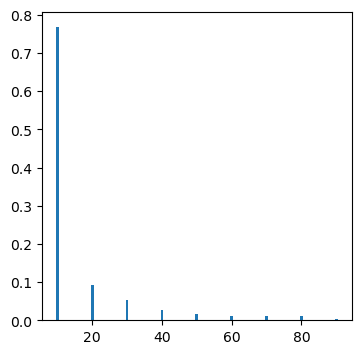

In [17]:
plot_counts(bin_counts)